In [ ]:
import random
import secrets
import math
import numpy as np
import matplotlib.pyplot as plt

#source for heapsort implementation
#https://www.programiz.com/dsa/heap-sort
#idea by pierre
#maybe use some weigthed approach instead of median. the middleground between mean and median


In [ ]:
class agent:

    def __init__(self, dt = None, idb = 10, t = 10):
        '''Give every agent a random dataset: an onedimensional integer if not otherwise defined via dt
        -idb is byte length of agent identifier
        -t range of time of the data'''

        #the random data will be replaced by the sumo dlr simulation
        self.data = 10 + float(np.random.normal(0,1,1))
        if dt:
            self.data = dt

        self.datatime = random.randrange(t)
        
        #hash of the data
        self.hash = hash(self.data)

        #randomly assigned id token
        self.id = secrets.token_hex(idb)
        
        self.stor = []
        self.info = (self.id,self.hash,self.data)
    
    def submit(self):
        return (self.hash,self.id, self.datatime)
    
    def submitall(self):
        return (self.hash,self.id, self.datatime, self.data)
    
    def store(self,info):
        self.stor.append(info)


In [ ]:
class dledger:
    
    def __init__(self):
        self.submissions = dict()
        self.submissioncount = 0
    
    def datasubmission(self, submission):
        self.submissions[self.submissioncount] = submission
        self.submissioncount += 1
    
    def initialisesort(self):
        #initialisation of counting parameter for heapsort algorithm
        self.n = self.submissioncount
        self.i = self.n//2
        self.largest = self.i
        self.l = 2 * self.i + 1
        self.r = 2 * self.i + 2
        
        #save hashes, ids, and indices. this depends on the order in submission: self.hash, self.id, self.datatime
        self.hashes = [(i) for i,j,k in ledger.submissions.values()]
        self.ids = [(j) for i,j,k in ledger.submissions.values()]

        #arr maps the original order / IDs to the sorted order: indices of arr reflect original indices or IDs of agents
        #and the values of arr at this position the indices in sorted order
        self.arr = list(ledger.submissions.keys())
        
    def getid(self,index):
        
        return self.ids[self.arr[index]]
    


In [ ]:
def comparestore(agent1,agent2):
    agent1.store(agent2.info)
    agent2.store(agent1.info)
    return agent1.data < agent2.data

def heapify(ledger, agents):
# Find largest among root and children
    ledger.largest = ledger.i
        
    ledger.l = 2 * ledger.i + 1
    ledger.r = 2 * ledger.i + 2

    if ledger.l < ledger.n and comparestore(agents[ledger.arr[ledger.i]],agents[ledger.arr[ledger.l]]):
        ledger.largest = ledger.l
       
    if ledger.r < ledger.n and comparestore(agents[ledger.arr[ledger.largest]],agents[ledger.arr[ledger.r]]):
        ledger.largest = ledger.r
       
    # If root is not largest, swap with largest and continue heapifying
    if ledger.largest != ledger.i:
        ledger.arr[ledger.i], ledger.arr[ledger.largest] = ledger.arr[ledger.largest], ledger.arr[ledger.i]
        ledger.i = ledger.largest
        heapify(ledger, agents) 
        
        
def heapsort(ledger, agents):
    # Build max heap
    for i in range(ledger.n//2,-1,-1):
        ledger.i= i
        heapify(ledger,agents)

    for i in range(ledger.n-1, 0, -1):
        # Swap
        ledger.arr[i], ledger.arr[0] = ledger.arr[0], ledger.arr[i]

        # Heapify root element

        ledger.n = i
        ledger.i = 0
        heapify(ledger,agents)
    
def median(ledger, agents):
    ledger.n = ledger.submissioncount
    if ledger.n%2 == 0:
        ledger.mediantime = (agents[ledger.arr[ledger.n//2]].datatime + agents[ledger.arr[ledger.n//2+1]].datatime)/2
        ledger.median = (agents[ledger.arr[ledger.n//2]].data+ agents[ledger.arr[ledger.n//2+1]].data)/2
    elif ledger.n%2 ==1:
        ledger.median = agents[ledger.arr[ledger.n//2+1]].data
        ledger.mediantime = agents[ledger.arr[ledger.n//2+1]].datatime
        
def difficulty(agent, ledger, d_zero=1, alpha=0.1, beta = 10, gamma= 0.1, tau = 3):
    dif = d_zero + alpha * abs(agent.data-ledger.median)
    if agent.data-ledger.median > beta + gamma * math.e**(abs(agent.datatime-ledger.mediantime)*tau):
        dif = 'INF'
    return dif
    
    

In [ ]:
alpha=0.1
beta = 10
gamma= 0.1
tau = 3
beta + gamma * math.e**(1*tau)

# median implementation

In [ ]:

#simulation for n agentes
random.seed(10)
n = 100

agents = [agent() for i in range(n)]
agents.append(agent(dt=10000))
agents.append(agent(dt=200))
ledger = dledger()

for i in agents:
    ledger.datasubmission(i.submit())

ledger.initialisesort()

heapsort(ledger, agents)

median(ledger,agents)

difficulties = []
outliercount = 0
#print('difficulties for the {} agents are:'.format(n))
for a in agents:
    dif = difficulty(a, ledger)
    if dif!='INF':
        difficulties.append(dif)
    else:
        outliercount += 1
#    print('agent:',a.id,'; difficulty: ',dif)

y = np.asarray(difficulties)
plt.xticks(rotation=90)
plt.hist(y, bins = 20)
plt.title('Difficulties distribution')
plt.show()
print('{} outliers were removed'.format(outliercount))

In [ ]:
ledger.submissioncount = 100000
beta = (np.log(10)-np.log(100/3))/(np.log(9)-np.log(100))
split = ((1/3 * ledger.submissioncount**-beta * 9**beta))
beta, split , ledger.submissioncount*split, int(1/split)


(0.4999999999999999, 0.003162277660168382, 316.2277660168382, 316)

# median mean implementation

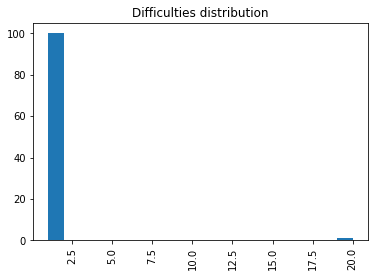

1 outliers were removed


In [ ]:
#simulation for n agentes
random.seed(10)
n = 100

agents = [agent() for i in range(n)]
agents.append(agent(dt=10000))
agents.append(agent(dt=200))
ledger = dledger()

for i in agents:
    ledger.datasubmission(i.submitall())

#group agents
# number of agents should be minimum 9 for somewhat meaningful results; 3 groups of 3 agents
# 3 agents so that they cannot not for certain which data the other 2 agents of their group have
# and 3 groups to get 3 mean, to take the median
#split is parameterised that is 3 agents per group if n = 9 and 10 agents per group for n = 100

beta = (np.log(10)-np.log(100/3))/(np.log(9)-np.log(100))
split = ((1/3 * ledger.submissioncount**-beta * 9**beta))
ngroups = int(1/split)
groups = [[] for i in range(ngroups)]

for i in range(ledger.submissioncount):
#    groups[int((i+split*ledger.submissioncount)%(split*ledger.submissioncount))].append(ledger.submissions[i])
    groups[i%ngroups].append(ledger.submissions[i])

mean = []
meantime = []
for group in groups:
    s = 0
    t = 0
    for a in group:
        s += a[3]
        t += a[2]
    mean.append(s/len(group))
    meantime.append(t/len(group))

sort_index = np.argsort(mean)
n_groups = len(groups)
if n_groups%2 == 1:
    median = mean[sort_index[n_groups//2+1]]
    mediantime = meantime[sort_index[n_groups//2+1]]

elif n_groups%2 == 0:
    median = (mean[sort_index[n_groups//2+1]] + mean[sort_index[n_groups//2]]) / 2
    mediantime = (meantime[sort_index[n_groups//2+1]] + meantime[sort_index[n_groups//2+1]])/2

ledger.median = median
ledger.mediantime = mediantime
# split of n is function of n
# when n = 6, split is 1/3
# decreases with n

#print('difficulties for the {} agents are:'.format(n))
#for a in agents:
#    print('agent:',a.id,'; difficulty: ',difficulty(a, ledger))

#split and mix their their data within groups for mean

#publish and sort means

# choose median of mean or remove outliers and compute overall mean then


difficulties = []
outliercount = 0
#print('difficulties for the {} agents are:'.format(n))
for a in agents:
    dif = difficulty(a, ledger)
    if dif!='INF':
        difficulties.append(dif)
    else:
        outliercount += 1
#    print('agent:',a.id,'; difficulty: ',dif)

y = np.asarray(difficulties)
plt.xticks(rotation=90)
plt.hist(y,bins= 20)
plt.title('Difficulties distribution')
plt.show()
print('{} outliers were removed'.format(outliercount))

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=8b81a959-51f8-469a-8dd7-054eee2b945d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>